In the players data set, there are 196 observations and 7 variables. The 7 variables are: 

experience (chr) - player's experience level

subscribe (lgl) - if the player subscribes to the gaming newsletter

hashedEmail (chr) - their email

played_hours (dbl) - amount of time they've played the game in hours

name (chr) - name of the player

gender (chr) - gender of the player 

age (dbl) - age of the player

The types of data shown are character(chr), double(dbl), and logical(lgl). Characters represent any number or character within apostrophes. Double data type represents any numbers with decimals. The last data type is logical which only has two options, either TRUE or FALSE. The numerical averages of hours played and age are  5.85 hours and 21.14 years old. 

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. In this project, I'm asking the question, can age predict how much time a player spends playing the game? If it is a good predictor, we can hone in on what ages are more likely to result in a higher playing time. These players are the ones that will contribute a large amount of data, and are to be targeted in recruiting efforts. I will use the players data set because it has the ages of different players and the amount of hours they have played. Since I will be using regression I won't need to scale and center the data. 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/danayong25-cell/individual-project-planning/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
hours_avg <- players |>
summarise(average = mean(played_hours)) 

age_avg <- players |>
summarise(avg = mean(Age, na.rm = TRUE))
age_avg
hours_avg

avg
<dbl>
21.13918


average
<dbl>
5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


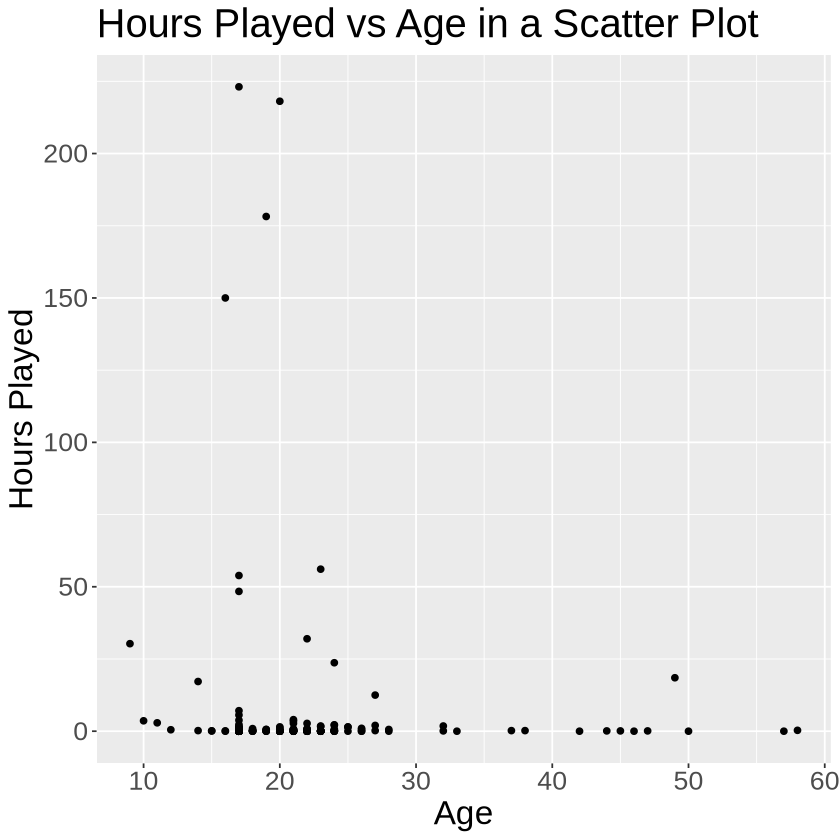

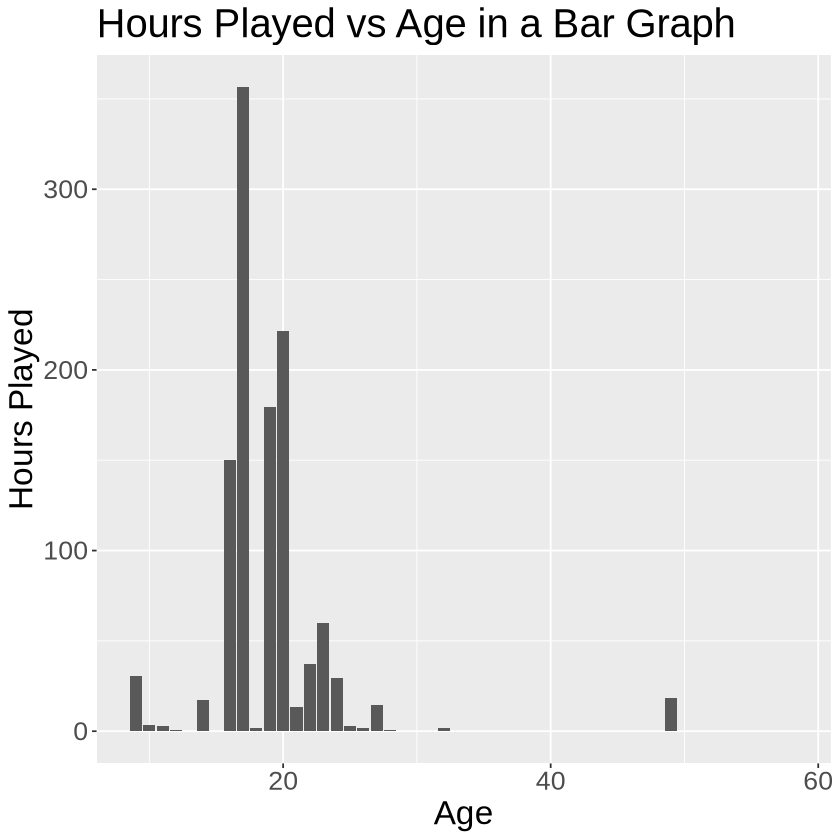

In [6]:
players_avh_plot <- players |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point() +
labs(x = "Age", y = "Hours Played") +
theme(text = element_text(size = 20)) +
ggtitle("Hours Played vs Age in a Scatter Plot")
players_avh_plot

players_avh_barplot <- players |>
ggplot(aes(x = Age, y = played_hours)) +
geom_bar(stat = 'identity') +
labs(x = "Age", y = "Hours Played") +
theme(text = element_text(size = 20)) +
ggtitle("Hours Played vs Age in a Bar Graph")
players_avh_barplot

This plot is helpful to the question because it is used to see if there is any relationship between hours played and age. It helped me determine whether to use linear regression or k-nearest neighbors regression. Since there isn't a linear relationship between the two variables, I couldn't use linear regression and chose k-nearest neighbors regression instead. 

I will use KNN regression to predict the hours played from age. I am using regression because we need to predict a number and not a category. Both age and hours played are numerical values so they can easily be put into the regression model. I will be using KNN Regression over linear regression because there isn't a linear relationship between age and hours played. For splitting the data, I will use a 70/30 split of the training and test data, because it is an even split. This split will be done in the beginning before I start any part of the regression. I would use 5 fold cross validation to ensure my answer was correct. I think the accuracy of the data will be able to be seen in 5 sections and any more than that isn't needed. Some weaknesses of the model I chose is that it will have a hard time making predictions for any ages that are far out of the range I used in the training data. 

link to Git Hub: https://github.com/danayong25-cell/individual-project-planning.git